# Contando Palavras
Neste capítulo iremos começar a interagir com os textos no nível da linguagem, por meio das ferramentas do Processamento de Linguagem Natural (PLN). Vamos progredir gradualmente nossa representação da linguagem a partir da morfologia, passando pela sintaxe e chegando à semântica. 

Nesta etapa, faremos uso de biliotecas especializadas em PLN como o [NLTK](https://www.nltk.org/) e a [Spacy](https://spacy.io/). 

In [1]:
import nltk
import spacy
from collections import Counter
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Bibliotecas de PLN requerem o carregamento de modelos de liguagem para funcionar de maneira apropriada: para este capitulo iremos carregar os modelos específicos da lingua portuguesa. Para isso precisamos executar comandos no terminal do sistema operacional:

In [3]:
!python -m spacy download pt

  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.0.0-cp37-none-any.whl size=38749350 sha256=dfcea2760cb05d8c46af42f73d78f1dd8422eea0ec2d28e16f2128c61dc13cc6
  Stored in directory: C:\Users\FLAVIO~1.COE\AppData\Local\Temp\pip-ephem-wheel-cache-6weludrx\wheels\0b\f1\54\a8f759b41cf39d2a33d6da84cd90b8e2fefea549963396bbd2
Successfully built pt-core-news-sm

    Error: Couldn't link model to 'pt'
    Creating a symlink in spacy/data failed. Make sure you have the required
    permissions and try re-running the command as admin, or use a
    virtualenv. You can still import the model as a module and call its
    load() method, or create the symlink manually.

    C:\Users\flavio.codeco.coelho\.conda\envs\curso\lib\site-packages\pt_core_news_sm
    -->
    C:\Users\flavio.codeco.coelho\.conda\envs\curso\lib\site-packages\spacy\data\pt


    Creating a shortcut link for 'en' didn't work (maybe you don't have
    admin permissions?), but you can still load the model via its full
 

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Para contar as palavras de um texto, é preciso primeiro separá-las uma a uma. A este processo dá-se o nome de tokenização, e é típicamente fácil de fazer mal-feito e difícil de fazer bem-feito.

Primeiramente precisaremos carregar os verbetes com a função que criamos no capítulo 1.

In [5]:
from sqlalchemy import create_engine

In [7]:
eng = create_engine("sqlite:///minha_tabela.sqlite")
#dhbb = pd.read_sql_table('resultados')
biograficos = pd.read_sql_query('select * from resultados where natureza="biográfico"', con=eng)
biograficos.head()

,index,arquivo,title,natureza,sexo,cargos,corpo
0,0,1.text,"COELHO, Machado",biográfico,m,\n - dep. fed. DF 1927-1929 \n - dep. fed. DF ...,\n\n«José Machado Coelho de Castro» nasceu em ...
1,1,10.text,"ABÍLIO, Armando",biográfico,m,\n - dep. fed. PB 1995-1999\n - dep. fed. PB ...,\n\n«Armando Abílio Vieira» nasceu em Itaporan...
2,2,100.text,"ALEIXO, Pedro",biográfico,m,\n - const. 1934\n - dep. fed. MG 1935-1937\n ...,"\n\n«Pedro Aleixo» nasceu em São Caetano, dist..."
3,3,1000.text,"CAMPOS, Eduardo",biográfico,m,\n - dep. fed. PE 1995\n - dep. fed. PE 1998-...,\n\n«Eduardo Henrique Accioly Campos» nasceu e...
4,4,1001.text,"CAMPOS, Eleazar Soares",biográfico,m,\n - magistrado\n - interv. MA 1945-1946\n,\n\n«Eleazar Soares Campos» nasceu em São Luís...


## Tokenização com o NLTK

In [9]:
palavras = nltk.word_tokenize(biograficos.corpo[0])
palavras[:]

['«',
 'José',
 'Machado',
 'Coelho',
 'de',
 'Castro',
 '»',
 'nasceu',
 'em',
 'Lorena',
 '(',
 'SP',
 ')',
 '.',
 'Estudou',
 'no',
 'Ginásio',
 'Diocesano',
 'de',
 'São',
 'Paulo',
 'e',
 'bacharelou-se',
 'em',
 '1910',
 'pela',
 'Faculdade',
 'de',
 'Ciências',
 'Jurídicas',
 'e',
 'Sociais',
 '.',
 'Dedicando-se',
 'à',
 'advocacia',
 ',',
 'foi',
 'promotor',
 'público',
 'em',
 'Cunha',
 '(',
 'SP',
 ')',
 'e',
 'depois',
 'delegado',
 'de',
 'polícia',
 'no',
 'Rio',
 'de',
 'Janeiro',
 ',',
 'então',
 'Distrito',
 'Federal',
 '.',
 'Iniciou',
 'sua',
 'vida',
 'política',
 'como',
 'deputado',
 'federal',
 'pelo',
 'Distrito',
 'Federal',
 ',',
 'exercendo',
 'o',
 'mandato',
 'de',
 '1927',
 'a',
 '1929',
 '.',
 'Reeleito',
 'para',
 'a',
 'legislatura',
 'iniciada',
 'em',
 'maio',
 'de',
 '1930',
 ',',
 'ocupava',
 'sua',
 'cadeira',
 'na',
 'Câmara',
 'quando',
 ',',
 'em',
 '3',
 'de',
 'outubro',
 ',',
 'foi',
 'deflagrado',
 'o',
 'movimento',
 'revolucionário',
 'li

Uma vez "tokenizado" o texto podemos contar as palavras muito simplesmente usando a função `Counter`do Python

In [28]:
c = Counter(palavras)
c.most_common(n=10)

[('de', 22),
 (',', 20),
 ('em', 16),
 ('.', 14),
 ('a', 10),
 ('no', 8),
 ('e', 7),
 ('da', 6),
 ('(', 5),
 (')', 5)]

Outra maneira de fazer isso seria usando o NLTK. Com a vantagem de ainda podermos visualizar graficamente.

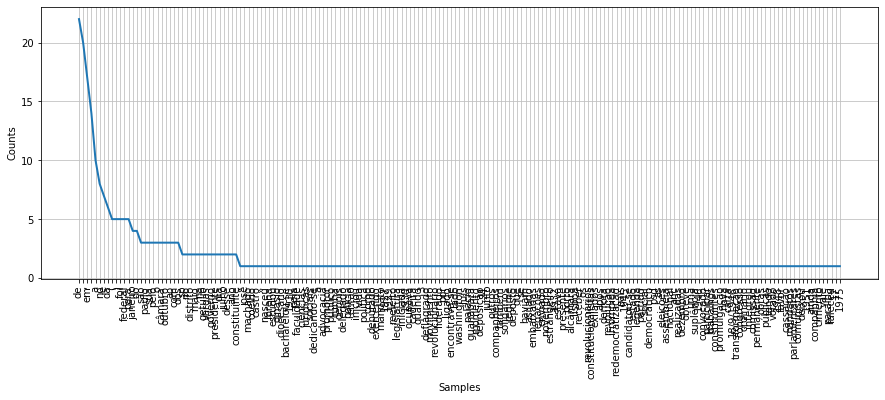

In [17]:
figure(figsize=(15,5))
fd = nltk.FreqDist([p.lower() for p in palavras])
fd.plot();

In [22]:
print("Numero de tokens:", len(palavras))
print("Tamanho do Vocabulário:", len(set([p.lower() for p in palavras])))

Numero de tokens: 341
Tamanho do Vocabulário: 185


Como vemos no exemplo acima, as palavras mais frequentes não muito informativas. Muitas vezes pode ser útil removê-las da análise. Linguistas costumams chamar este tipo de palavras de **stop-words**. Alem disso, vamos tambem remover as pontuaçoes. 

In [25]:
sw = nltk.corpus.stopwords.words('portuguese')
from string import punctuation
print(punctuation)
sw[:10]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

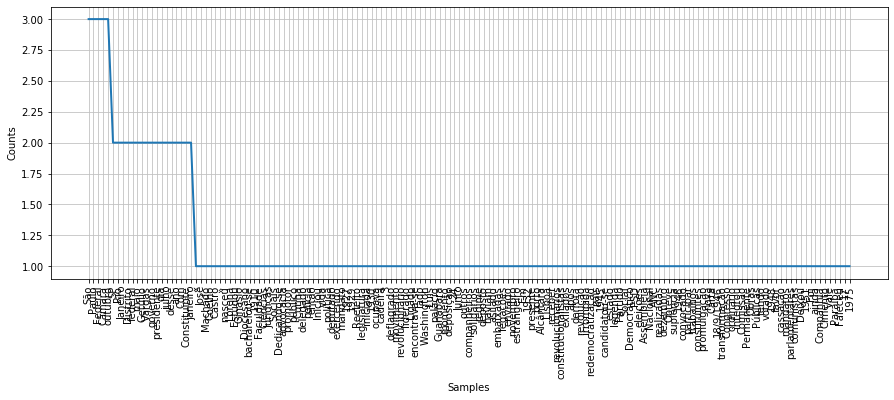

In [26]:
figure(figsize=(15,5))
fd = nltk.FreqDist([p for p in palavras if p not in sw+list(punctuation)])
fd.plot();

# Analizando coleções de textos
Acima analizamos o conteúdo de apenas um verbete, mas seria bem mais relevante podermos fazer a análise em uma coleção de verbetes. Para isso aprenderemos a criar um objeto `TextCollection` que como o nome diz, representa uma coleção de texto, mas que nos permite a realização de análises a nível de coleção.

In [27]:
tc = nltk.TextCollection([nltk.word_tokenize(c) for c in biograficos.corpo])

In [29]:
nltk.FreqDist(tc)

FreqDist({',': 587463, 'de': 517135, '.': 259249, 'do': 226381, 'a': 214979, 'e': 192479, 'da': 181854, 'em': 153158, 'o': 148578, ')': 87927, ...})

In [33]:
tc.concordance??

In [49]:
linhas = tc.concordance_list('filho',width=150)
linhas

[ConcordanceLine(left=['Cimento', 'Vale', 'do', 'Paraíba', '.', 'Faleceu', 'no', 'Rio', 'de', 'Janeiro', 'no', 'dia', '17', 'de', 'maio', 'de', '1975', '.', '«', 'Armando', 'Abílio', 'Vieira', '»', 'nasceu', 'em', 'Itaporanga', '(', 'PB', ')', 'no', 'dia', '29', 'de', 'dezembro', 'de', '1944', ','], query='filho', right=['de', 'Argemiro', 'Abílio', 'de', 'Sousa', 'e', 'de', 'Luísa', 'Bronzeado', 'Vieira', '.', 'Em', '1962', 'ingressou', ',', 'em', 'Recife', ',', 'na', 'Faculdade', 'de', 'Ciências', 'Médicas', 'da', 'Universidade', 'Federal', 'de', 'Pernambuco', ',', 'pela', 'qual', 'se', 'graduou', 'em', '1968', '.'], offset=360, left_print='io Vieira » nasceu em Itaporanga ( PB ) no dia 29 de dezembro de 1944 ,', right_print='de Argemiro Abílio de Sousa e de Luísa Bronzeado Vieira . Em 1962 ingre', line='io Vieira » nasceu em Itaporanga ( PB ) no dia 29 de dezembro de 1944 , filho de Argemiro Abílio de Sousa e de Luísa Bronzeado Vieira . Em 1962 ingre'),
 ConcordanceLine(left=['e', 'a

In [55]:
linhas[0].right

['de',
 'Argemiro',
 'Abílio',
 'de',
 'Sousa',
 'e',
 'de',
 'Luísa',
 'Bronzeado',
 'Vieira',
 '.',
 'Em',
 '1962',
 'ingressou',
 ',',
 'em',
 'Recife',
 ',',
 'na',
 'Faculdade',
 'de',
 'Ciências',
 'Médicas',
 'da',
 'Universidade',
 'Federal',
 'de',
 'Pernambuco',
 ',',
 'pela',
 'qual',
 'se',
 'graduou',
 'em',
 '1968',
 '.']

## Exercício
Utilizando a ferramenta de concordance, procure extrair a filiação dos verbetados, escrevendo uma função que percorra todas as ocorrências da palavra "filho", separando aquelas com sentido de indicação de filiação.

In [78]:
def encontra_pais():
    linhas = tc.concordance_list('filho',width=180, lines=50000)
    print("Processando {} linhas".format(len(linhas)))
    i = 0
    for linha in linhas:
        if linha.right[0] not in ['de', 'da', 'do']:
            continue
        right = linha.right[1:]
        try:
            pos_virg = right.index(',')
        except ValueError:
            pos_virg = 100
        try:
            pos_pt = right.index('.')
        except ValueError:
            pos_pt = 100
        fim = min(pos_virg, pos_pt)
        pais = right[:fim]
        if 'e' in pais:
            pai = " ".join(pais[:pais.index('e')])
            mae = " ".join([p for p in pais[pais.index('e'):] if p not in [',', 'de', 'e']])
        else:
            pai = " ".join(pais)
            mae = "desconhecida."
        i += 1
        print("Pai:",pai, '\n', "Mãe:", mae)
    print("Encontramos progenitores em {} linhas".format(i))
encontra_pais()

Processando 10181 linhas
Pai: Argemiro Abílio de Sousa 
 Mãe: Luísa Bronzeado Vieira
Pai: João Carlos Zoghbi 
 Mãe: desconhecida.
Pai: comerciante José Caetano Aleixo 
 Mãe: Úrsula Martins Aleixo
Pai: Maximiano Accioly Campos 
 Mãe: Ana Lúcia Arraes Alencar
Pai: Francisco Gonçalves Campos 
 Mãe: Adelina Gonçalves Campos
Pai: comerciante José Justino Campos 
 Mãe: Noemi França Campos
Pai: Antônio Machado de Campos 
 Mãe: Ana Cândida da Silva
Pai: magistrado Jacinto Álvares da Silva Campos 
 Mãe: Azejúlia Sousa Silva
Pai: Manuel Soares Campos 
 Mãe: Irene Gomes Campos
Pai: Manuel Campos 
 Mãe: Alaíde Dantas Campos
Pai: Albino da Silva Campos 
 Mãe: Adalgisa da Costa Campos
Pai: Júlio Domingos Campos 
 Mãe: desconhecida.
Pai: José Dias Pinto Aleixo 
 Mãe: Esaltina Maria Paiva Aleixo
Pai: Júlio Domingos Campos 
 Mãe: desconhecida.
Pai: João Ferraz de Campos 
 Mãe: Edi Pereira Ferraz Campos
Pai: José Wilson Siqueira Campos 
 Mãe: Aureni Siqueira Campos
Pai: Júlio Domingos de Campos 
 Mãe: A

Pai: Olímpio Joaquim Cardoso 
 Mãe: Oliva Maria da Silva Cardoso
Pai: Ângelo Soligo 
 Mãe: Arlinda Gema Facioni Soligo
Pai: Urbano Ferreira de Araújo 
 Mãe: Mercedes Oliveira Araujo
Pai: João Carlos Paolilo Bacelar 
 Mãe: Lígia Silva Bacelar
Pai: Aziz Bahadian 
 Mãe: Gracinda Gabriel Bahadian
Pai: Manoel Nóbrega de Mello 
 Mãe: Joselita Baltazar da Nóbrega
Pai: Everton Bandeira Soeiro 
 Mãe: Ana Hilda Leite Faria
Pai: Jessé Lima Barbosa 
 Mãe: Maria Teresa Moura Barbosa
Pai: Antônio Barbosa 
 Mãe: Neusa Lara Barbosa
Pai: José Iran 
 Mãe: Maria Bernadina Torres Iran
Pai: João Cardoso Pais 
 Mãe: Alcina Saraiva Cardoso
Pai: Guido Gonzaga da Silva 
 Mãe: Deusdeth Barbosa da Silva
Pai: Antenor de Barros 
 Mãe: Iracema Pereira Goulart Barros
Pai: João Bassuma 
 Mãe: Iracema Bassuma
Pai: médico José Diogo Bastos 
 Mãe: da descendente libaneses Salma Bastos
Pai: Manuel Antônio dos Santos 
 Mãe: Elídia Vieira da Silva
Pai: José Francisco Batochio 
 Mãe: Dalva Vieira dos Santos Batochio
Pai: Dj

 Mãe: Maria Alice Rozzo Covatti
Pai: José Cozzolino 
 Mãe: Juraci Pereira Cozzolino
Pai: Mucio Crivella 
 Mãe: Eris Bezerra Crivella
Pai: Antônio Ferreira da Cruz 
 Mãe: Olga Bandeira da Cruz
Pai: Elcy Teixeira da Cunha 
 Mãe: Elza Cosentino da Cunha
Pai: Mílcio José da Cunha 
 Mãe: Alice Coelho da Cunha
Pai: Carlos Salzano Vieira da Cunha 
 Mãe: Ophelia Torelli Vieira da Cunha
Pai: Gabriel Cury Herreira 
 Mãe: Hilda Mansilla Salazar
Pai: José Cândido da Silva 
 Mãe: Maria José Alves da Silva
Pai: Cosme Carneiro Ferreira 
 Mãe: Maria Carneiro Ferreira
Pai: Jairo Borges de Almeida 
 Mãe: Edilma da Guia Almeida
Pai: Francisco José Pinto Filho 
 Mãe: Hélia Maciel D ’ Ângelo Pinto
Pai: José Dirceu de Carvalho 
 Mãe: Lázara Cândida do Carmo Leite Carvalho
Pai: Dagoberto Nogueira 
 Mãe: Roseli Bellagamba Nogueira
Pai: Joaquim Máximo da Fonseca 
 Mãe: Marília Damasceno Fonseca
Pai: Sebastião Alves de Oliveira 
 Mãe: Conceição Maria Ferreira Oliveira
Pai: Raymundo Tarcísio Delgado 
 Mãe: Aloys

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Mãe: Dora Voloch Nogueira Itagiba
Pai: Jackson Raimundo Soares 
 Mãe: Antonia Pereira Soares
Pai: Alencar Jacob 
 Mãe: Carmem Ramos Jacob
Pai: Aluísio Arnaldo Pereira Jardim 
 Mãe: Diana Calil Jardim
Pai: Valdemar Alves de Lima 
 Mãe: Raimunda Galha Almeida Lima
Pai: Antônio Joséide Abreu 
 Mãe: Ana Isaura Abreu
Pai: coronel Davi Antônio da Silva Carneiro 
 Mãe: Alice Monteiro Carvalho
Pai: Alexandre Mendes de Jesus 
 Mãe: Mirtes Bispo Jesus
Pai: Severino de Barros 
 Mãe: Maria Dalva Barros
Pai: Alonso Alves da Silva 
 Mãe: Ana Gonçalves da Silva
Pai: Miguel João Jorge 
 Mãe: Maria Isabel Saporetti
Pai: José Caetano da Silva 
 Mãe: Jovelina Júlia da Silva
Pai: Heráclito Juarez Filho 
 Mãe: Raimunda Pureza Juarez
Pai: Waldemar Theodoro Pereira 
 Mãe: Maria Lucia Junqueira Pereira
Pai: Joaquim Cândido Carneiro 
 Mãe: Maria do Carmo Carneiro da Silva
Pai: Antônio Barbosa das Neves 
 Mãe: Idalina Rodrigues da Silva
Pai: Edilberto Afonso de Morais 
 Mãe: Maria Cleildes Morais
Pai: Henrique 

Pai: Jurandir Cordeiro 
 Mãe: Augusta Montes Cordeiro
Pai: Baltazar Maria de Morais 
 Mãe: Conceição Faria Chaves
Pai: Francisco Machado Carrion 
 Mãe: Erna Kroeff Carrion
Pai: tropeiro Willy Morais 
 Mãe: da dona-de-casa Inês Irene Morais
Pai: Juarez Rodrigues Moreira 
 Mãe: Laurinda da Rocha Moreira
Pai: Walter Moreira da Silva 
 Mãe: Jaine Pecly Moreira
Pai: Jacir Moura 
 Mãe: Margarida Cardoso Oliveira.Em 2000 iniciou o curso filosofia na Faculdade Filosofia da Companhia Jesus
Pai: João Alves de Moura 
 Mãe: Esther França Campos
Pai: Edson Moury Fernandes 
 Mãe: Carmen Andrade Fernandes
Pai: Vilhebaldo Mourão 
 Mãe: Celestina Moura Leite Mourão
Pai: Cândido Diderot Machado Carrion 
 Mãe: Dirce da Silva Machado Carrion
Pai: Eraclydes Mulim da Costa 
 Mãe: Neir da Costa Nunes
Pai: Sadraque Muniz 
 Mãe: Dinah Cordeiro Muniz
Pai: Antonino Félix de Oliveira 
 Mãe: Francisca da Silva Resende Oliveira
Pai: Exupério Evangelista dos Anjos 
 Mãe: Ridalva Viana Brito
Pai: José Nascimento Silv

Pai: Crysanto de Jesus Rocha 
 Mãe: Leovegilda Lyrio Rocha
Pai: Elias de Araújo Rocha 
 Mãe: Rosa Rodrigues Rocha
Pai: Urzeni da Rocha Freitas 
 Mãe: Andrezina da Rocha Freitas
Pai: Nello Rodolfo Giongo 
 Mãe: Marly Antonia Giongo
Pai: Camilo Rodovalho Neto 
 Mãe: Albertina Lemos Rodovalho
Pai: Alcides Rodrigues Silva 
 Mãe: Maria S. da Silva
Pai: Valério de Castro Rodrigues de Souza 
 Mãe: Cordália Campelo Rodrigues Souza
Pai: Manuel Pereira de Carvalho 
 Mãe: Francisca Leopoldina Carvalho
Pai: família pobre 
 Mãe: desconhecida.
Pai: José Júlio Pinto 
 Mãe: Lucília Jesus Rodrigues
Pai: Gumercindo Rodrigues 
 Mãe: Abigail Rodrigues
Pai: Wilton Honorato Rodrigues 
 Mãe: Maria Décia Alencar Rodrigues
Pai: Luís Portelli Magalhães 
 Mãe: Edma Gonçalves Magalhães
Pai: Flávio Lúcio Oliveira Rolim 
 Mãe: Rosa Maria Schneider
Pai: Teresa Sobral Rollemberg 
 Mãe: Armando Leite Rollemberg
Pai: Joaquim Antonio de Carvalho 
 Mãe: Maria Rosalina Carvalho
Pai: pastor evangélico Abdoral Fernandes da 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




 Mãe: Silvia Macedo das Neves
Pai: Pedro Francisco Vieira 
 Mãe: Maria Vieira
Pai: Felisberto da Silva Carvalho 
 Mãe: Maria Perciliana Carvalho
Pai: Mauro Vieira 
 Mãe: Noêmia Iecker Vieira
Pai: Angelo Vignatti 
 Mãe: Nila Vignatti
Pai: João Bosco Veloso 
 Mãe: Nelma Vilela Veloso
Pai: João Batista Paniago Vilela 
 Mãe: Corina Célia Moura Vilela
Pai: Hercílio Vitorassi 
 Mãe: Angelina Mafiolete Vitorassi
Pai: Iliobaldo Soares da Silva 
 Mãe: Dilma Vivas da Silva
Pai: Alípio Volpi 
 Mãe: Dertiza Gilioli Volpi
Pai: Egídio Voltolini 
 Mãe: Elisabeta Papp Voltolini
Pai: Ary de Sousa 
 Mãe: Luísa Alves Sousa
Pai: chinês naturalizado brasileiro Chin Liang Woo 
 Mãe: da japonesa também naturalizada brasileira Sugi Chumu Liao Woo
Pai: Dorgival Marques Xavier 
 Mãe: Raimunda Ferreira Xavier
Pai: Alexandre C. Xerfan 
 Mãe: Maura C. Xerfan
Pai: Júlio Zacharow 
 Mãe: Altina Zacharow
Pai: Fiori Zambiazi 
 Mãe: Antônia Zambiazi
Pai: Ricardo Zarattini Filho 
 Mãe: Alceste Rolim Moura
Pai: Ricardo Z

Pai: Irani Leonardo Cherini 
 Mãe: Noemia dos Santos Cherini
Pai: Francisco Gil Castelo Branco 
 Mãe: desconhecida.
Pai: José Colnaghi 
 Mãe: Carolina Binda Colnaghi
Pai: Ernesto Conforto 
 Mãe: Thereza Alves Conforto
Pai: Eli Corrêa 
 Mãe: desconhecida.
Pai: jornalista Villas Boas Corrêa 
 Mãe: Regina Sá Corrêa
Pai: Henoch Coutinho de Melo 
 Mãe: Carmen Rodrigues Coutinho Melo
Pai: Elbio Alcides Hinterholz 
 Mãe: Celina Carolina Deus Hinterholz
Pai: Adib Moisés Dib 
 Mãe: Olga Zayat Dib
Pai: José Dirceu de Oliveira 
 Mãe: Silva Clara Becker
Pai: Domingos Gomes de Aguiar Filho 
 Mãe: Patrícia Pequeno Costa Gomes Aguiar
Pai: João Marcelino Ferreira 
 Mãe: Maria José Ferreira
Pai: oficial do Exército Cândido Borges Castelo Branco 
 Mãe: Antonieta Alencar Castelo Branco
Pai: Aluísio dos Santos 
 Mãe: Maria Isabel Muniz Moreira dos Santos
Pai: Eduardo Studart da Fonseca 
 Mãe: Lúcia Erichsen da Fonseca
Pai: José Antonio Novo 
 Mãe: Lucia Maria Feliciano
Pai: Manuel Ferreira da Silva 
 Mãe:

Pai: Raul Stein de Almeida 
 Mãe: Daidra Teresa Guimarães Almeida
Pai: Álvaro Fiúza de Castro 
 Mãe: desconhecida.
Pai: que as forças armadas pedissem a renúncia do presidente 
 Mãe: do vice-presidente
Pai: general Álvaro Fiúza de Castro 
 Mãe: Haidéia Viana Fiúza Castro
Pai: Bretislau Manuel de Castro 
 Mãe: Maria Augusta Meneses Castro
Pai: Benedito Soares de Castro 
 Mãe: Ana das Neves Freitas Castro
Pai: vítima 
 Mãe: desconhecida.
Pai: Ibsen de Caiado Castro 
 Mãe: Maria Veiga Castro
Pai: Otávia Sarmento de Castro 
 Mãe: Manuel Ismael Castro
Pai: Manuel Apolônio de Castro 
 Mãe: Josefa Barbosa Castro
Pai: Liberato Magno da Silva Castro 
 Mãe: Consuelo Alvarez Castro
Pai: Luís Alves de Castro 
 Mãe: Maria José Sousa
Pai: Franklin Ribeiro de Almeida 
 Mãe: Alzira Guimarães Almeida
Pai: Cristóvão Leite de Castro 
 Mãe: Maria da Conceição Mac Dowell Leite Castro
Pai: Manuel Castro de Azevedo 
 Mãe: Olga Emília Figueiredo Azevedo
Pai: Manuel Castro Gomes de Andrade 
 Mãe: Maria Cândida

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Pai: Natal Cicote 
 Mãe: Ludovica Munhato
Pai: Santo Agostinho Cignachi 
 Mãe: Ângela Fabris Cignachi
Pai: Praxedes Dias de Andrade 
 Mãe: Carlota Cincurá Andrade
Pai: Joaquim Cintra 
 Mãe: Dulce Avelar Medeiros Cintra
Pai: João Cioni Neto 
 Mãe: Alice Marcolino Cioni
Pai: Carlos Cyrillo 
 Mãe: Maria da Graça Cyrillo
Pai: James Frederick Clark 
 Mãe: desconhecida.
Pai: Oscar Castelo Branco Clark 
 Mãe: Lúcia Mendonça Clark
Pai: Inácio Augusto de Almeida 
 Mãe: desconhecida.
Pai: um total de 11 
 Mãe: desconhecida.
Pai: Augusto Teixeira de Oliveira 
 Mãe: Maria Florentina Lemos Oliveira
Pai: Leon Francisco Clerot 
 Mãe: Luzia Barbosa Ramalho Clerot
Pai: Mário Ferreira Neto 
 Mãe: Beranisa Toledo Neto
Pai: José Côdo 
 Mãe: Elvira Martins Côdo
Pai: Antônio José Coelho 
 Mãe: desconhecida.
Pai: Antônio Rodrigues Coelho Júnior 
 Mãe: Rita Augusta Sales Coelho
Pai: Hermógenes Ferreira Coelho 
 Mãe: Indalícia Guedes Amorim Coelho
Pai: José Vieira Coelho 
 Mãe: Maria Emerentina Gouveia Coelho


Pai: Raimundo Costa Sobrinho 
 Mãe: Emília Gonzaga Costa
Pai: Inácio Loiola da Costa 
 Mãe: desconhecida.
Pai: Alfredo Ribeiro da Costa 
 Mãe: Antônia Moutinho da Costa
Pai: José Trajano Ferreira Costa 
 Mãe: Maria Lemos Vasconcelos Costa
Pai: Francisco Salustiano da Costa 
 Mãe: Susana Sampaio Costa
Pai: Manuel Clarindo Costa 
 Mãe: Maria Gonçalves Fonseca
Pai: Manuel de Sousa Costa 
 Mãe: Maria Eulália Sousa Costa
Pai: Antônio Ferreira da Costa 
 Mãe: Maria Curcina do Nascimento Costa
Pai: Artur Emiliano Costa 
 Mãe: Mariana Ribeiro Lontra Costa
Pai: José Costa 
 Mãe: Maria Mercedes Dantas
Pai: Francisco Pereira da Costa Filho 
 Mãe: Júlia Amélia Coutinho da Costa
Pai: Luís Martins Costa 
 Mãe: desconhecida.
Pai: Pompílio Costa 
 Mãe: Almerinda Oliveira Costa
Pai: Álvaro Correia da Costa 
 Mãe: Alaíde Lima Correia
Pai: Válter Augusto Rodrigues Costa 
 Mãe: Hilda Rodrigues Costa
Pai: Paulino Gomes da Costa 
 Mãe: Cândida Nina Gomes da Costa
Pai: industrial Gervásio Raulino da Silva Co

 Mãe: Maria Miguéis Curvo
Pai: Joaquim Augustinho Curvo Sobrinho 
 Mãe: Avanildes Moreira Curvo
Pai: Bento Antônio Curvo 
 Mãe: Antônia Ferreira Curvo
Pai: Antônio de Melo Alvarenga 
 Mãe: Clóris Junqueira Alvarenga
Pai: Espir Cury 
 Mãe: Nazaré Cury
Pai: Said Cury 
 Mãe: Adélia Cury
Pai: Jorge Said Cury 
 Mãe: Judith Pacheco Cury
Pai: Antônio Bernardo dos Santos 
 Mãe: Diva Cutolo
Pai: Antônio D'Agostino 
 Mãe: Vicenta D'Agostino
Pai: Ângelo Dalla Vecchia 
 Mãe: Clarice França Dalla Vecchia
Pai: Jacó Dalla 
 Mãe: Maria Mourão Dalla
Pai: Ernesto Dallanhol 
 Mãe: Josefina Dallanhol
Pai: Paulo Dall ’ Oglio 
 Mãe: Ema Simon Dall ’ Oglio
Pai: Antônio Álvares Fernandes 
 Mãe: Maria Joana Vieira Maciel
Pai: Otávio Dalpasquale 
 Mãe: Luísa Dalpasquale
Pai: Domingos Dal-Prá 
 Mãe: Ida Ravizoni Dal-Prá
Pai: Manuel de Cerqueira Daltro 
 Mãe: desconhecida.
Pai: Silvestro Domenico Damiani 
 Mãe: Amália Damiani
Pai: Pieter Omer van Damme 
 Mãe: Martha Maria Smet
Pai: Bruno José Daniel 
 Mãe: Maria 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Pai: Gabriel Pedrosa Domingues 
 Mãe: Gelsa Lima Domingues
Pai: José Domingues da Silva 
 Mãe: Davina Araújo Domingues da Silva
Pai: Antônio Domingues 
 Mãe: Carolina Vieira Domingues
Pai: Humberto Donato 
 Mãe: desconhecida.
Pai: Nélson da Costa Dória 
 Mãe: Maria Geraldina Oliveira Dória
Pai: Almiro de Macedo Alves 
 Mãe: Celina Tavares Alves
Pai: Gustavo Rodrigues da Costa Dória 
 Mãe: Maria Soledade Costa Dória
Pai: Cândido Dória 
 Mãe: Cristina Sampaio Dória
Pai: Antônio de Lima Dória 
 Mãe: Maria Seixas Dória
Pai: Modesto Dornelles 
 Mãe: desconhecida.
Pai: general Ernesto Francisco Dornelles 
 Mãe: Amélia Rodrigues Dornelles
Pai: Mozart Dornelles 
 Mãe: Mariana Neves Dornelles
Pai: Ademar da Silva Loula 
 Mãe: Teonília Dourado Loula
Pai: Antônio Otaviano Dourado 
 Mãe: Alzira Guanais Lima Dourado
Pai: Francisco Moitinho Dourado 
 Mãe: Edite Oliveira Dourado
Pai: Antônio José Alves 
 Mãe: Julieta Nobre Alves
Pai: Salim Nicolau Duailibe 
 Mãe: Linda Saddy Duailibe
Pai: Francisco 

Pai: José Paulo da Silva 
 Mãe: Isaura Alves da Silva
Pai: Wady Neme Farhat 
 Mãe: Nagibe Salim Ribal
Pai: Antônio Joaquim de Castro Faria 
 Mãe: Francisca Barbosa Faria
Pai: Francisco Silvério de Faria 
 Mãe: Benedita Fontes Faria
Pai: José Bento de Faria 
 Mãe: Francisca Leite Faria
Pai: José Rocha Faria 
 Mãe: Maria da Conceição Gomes Pereira Faria
Pai: banqueiro Clemente Soares de Faria 
 Mãe: desconhecida.
Pai: Gustavo de Faria 
 Mãe: Isabel Maria Dale Faria
Pai: Antônio de Sá Faria 
 Mãe: desconhecida.
Pai: Afonso de Faria 
 Mãe: Maria Braga Faria
Pai: Francisco de Paula Rodrigues Alves 
 Mãe: Ana Guilhermina Oliveira Alves
Pai: Joaquim Alves de Faria 
 Mãe: Maria José Laranjeira Faria
Pai: professor Benjamim da Rocha Faria 
 Mãe: desconhecida.
Pai: Severino Barbosa de Farias 
 Mãe: Estefânia Arruda Farias
Pai: Gilberto Lopes Farias 
 Mãe: Joselita Holanda Cavalcanti Farias
Pai: Joaquim Barbosa Cordeiro de Farias 
 Mãe: Corina Padilha Cordeiro Farias
Pai: Esperidião Lopes de Fari

Pai: Euclides de Oliveira Figueiredo 
 Mãe: Valentina Silva Oliveira Figueiredo
Pai: Leopoldo de Oliveira Figueiredo 
 Mãe: Maria Augusta Silva Figueiredo
Pai: Euclides 
 Mãe: desconhecida.
Pai: Francisco Figueiredo 
 Mãe: Adélia Figueiredo
Pai: político Sócrates Renan de Faria Alvim 
 Mãe: Armia Resende Alvim
Pai: Eugênio Vieira de Figueiredo 
 Mãe: Rosa Teixeira Figueiredo
Pai: Bernardo Joaquim Figueiredo 
 Mãe: Carolina Dias Figueiredo
Pai: Argemiro de Figueiredo 
 Mãe: Alzira Ramos Figueiredo
Pai: Leopoldo Antunes de Figueiredo 
 Mãe: desconhecida.
Pai: Amauri Poggi de Figueiredo 
 Mãe: Giomar Medeiros Figueiredo
Pai: Orcírio Tiago de Oliveira 
 Mãe: Benedita Figueiró Oliveira
Pai: José Maria Filomeno Gomes 
 Mãe: Susana Moreira Filomeno Gomes
Pai: José Maria Filomeno Gomes 
 Mãe: Susana Moreira Filomeno Gomes
Pai: Afonso José Fioravante 
 Mãe: Ana Aleoni Fioravante
Pai: Laudemiro Nunes Fioravante 
 Mãe: Carolina Fioravante
Pai: cubano Joaquim Jacinto Amadeo y Perez 
 Mãe: da belga

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Maria Augusta Fraga
Pai: Clementino da Rocha Fraga 
 Mãe: Córdula Magalhães Fraga
Pai: Clementino da Rocha Fraga Júnior 
 Mãe: Olindina da Silva Fraga
Pai: médico Nicolau Fragelli 
 Mãe: Maria Fontanillas Fragelli
Pai: Jerônimo Fragomeni 
 Mãe: desconhecida.
Pai: Bernardo Fragoso 
 Mãe: Adelaide Sousa Fragoso
Pai: diplomata Luís Eulálio Fragoso 
 Mãe: Maria Luísa Boulitreau Fragoso
Pai: Aguinaldo Boulitreau Fragoso 
 Mãe: Corina Ifigênia Pessoa Fragoso
Pai: Joaquim Coelho Fragoso - comerciante de origem portuguesa 
 Mãe: desconhecida.
Pai: Antônio Ribeiro França 
 Mãe: Amélia Oliveira dos Santos França
Pai: Domingos Araújo do Amaral 
 Mãe: Olinda Guimarães do Amaral
Pai: Aristotelino Cruz 
 Mãe: Beatriz França Cruz
Pai: Adolfo Elias França 
 Mãe: Cleópatra Santiago França
Pai: José Vicente Monteiro da França 
 Mãe: desconhecida.
Pai: Antônio França Alves 
 Mãe: Adelaide Fernandes Gonçalves
Pai: Antônio José Auad 
 Mãe: Maria Inês França Auad
Pai: Roberto da Fonte Moreira França 
 Mãe:

 Mãe: Blanche Galassi
Pai: Francisco Galdino Teixeira 
 Mãe: Sebastiana Marinho Leite
Pai: Alípio Augusto do Amaral Júnior 
 Mãe: Iná Carvalho do Amaral
Pai: Avani Galdino da Silva 
 Mãe: Maria Matos da Silva
Pai: David Gale 
 Mãe: Neusa Matos Lavrador Gale
Pai: José Emídio Rodrigues Galhardo 
 Mãe: Maria Cecília Rodrigues Galhardo
Pai: Elias Galil 
 Mãe: Nazira Félix Galil
Pai: Timóteo Gallart 
 Mãe: Zilda Raposo Gallart
Pai: Carlos Júlio Galliez 
 Mãe: Clara Mendes da Luz Galliez
Pai: Beniamino Gallotti 
 Mãe: Francesca Angeli Gallotti
Pai: Beniamino Gallotti 
 Mãe: Francesca Angeli Gallotti
Pai: Luís Gallotti 
 Mãe: Maria Antonieta Pires Albuquerque Gallotti
Pai: Beniamino Gallotti 
 Mãe: Francesca Angeli Gallotti
Pai: José do Amaral 
 Mãe: desconhecida.
Pai: farmacêutico Alberto batista Galo 
 Mãe: Laurinda Duarte Galo
Pai: Leôncio Egídio Galrão 
 Mãe: Eudóxia Freire Carvalho Galrão
Pai: César Galvani 
 Mãe: Lucrécia Galvani
Pai: Orlando Galvão 
 Mãe: Mirtes Pereira Galvão
Pai: Jos

 Mãe: Geni Leite André Gomes
Pai: Miguel Gomez 
 Mãe: Roseli do Amaral Gomez
Pai: ex-diretor do Senado 
 Mãe: desconhecida.
Pai: Zoghbi 
 Mãe: desconhecida.
Pai: Gilberto Barreto Gomide 
 Mãe: Neusa Maria Crachineski Gomide
Pai: Trajano da Costa Mendes 
 Mãe: Maria Abadia Gomide da Costa
Pai: João Teófilo Gomy 
 Mãe: Clotilde Caillet Dellez Gomy
Pai: Bertolino Joaquim Gonçalves Júnior 
 Mãe: Maria Calderaro Gonçalves
Pai: Mohamed Nanhay 
 Mãe: Lazarina Gonçalves Nanhay
Pai: José Vieira Gonçalves 
 Mãe: Rosana Fernandes
Pai: Zózimo Francisco Gonçalves 
 Mãe: desconhecida.
Pai: comerciante 
 Mãe: fazendeiro Bento Gonçalves Catarina Jorge Gonçalves
Pai: engenheiro Augusto Gonçalves de Sousa 
 Mãe: Petrina Guimarães Gonçalves
Pai: Heráclito Diniz Gonçalves 
 Mãe: Guilhermina Diniz Gonçalves
Pai: José Deodato Soares 
 Mãe: Maria da Conceição Gonçalves Soares
Pai: José Gonçalves de Queirós 
 Mãe: Felismina Maria Queirós
Pai: Antônio Maria Gonçalves 
 Mãe: Maria da Conceição Folgado Gonçalves

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Mãe: Cristina Siqueira Guerreiro
Pai: José Afonso Guerreiro 
 Mãe: Ester Saraiva Guerreiro
Pai: Pedro Guidi 
 Mãe: Olívia Colonetti Guidi
Pai: Santos Guido 
 Mãe: Adelina Ferreira Guido
Pai: Domingos Aristides Guilhem 
 Mãe: Teresa Francisca Fontes Guilhem
Pai: almirante José Cândido Guillobel 
 Mãe: Elisa Almeida Guillobel
Pai: desembargador Inácio Guillon de Oliveira 
 Mãe: Helena Guillon Oliveira
Pai: Gottfrio Alberto Anders 
 Mãe: Ormi Simões Anders
Pai: poeta 
 Mãe: desconhecida.
Pai: general Teodorico Gonçalves Guimarães 
 Mãe: Estela Ticoulat Guimarães
Pai: capitão Pedro de Alencastro Guimarães 
 Mãe: Leopoldina Cardoso Alencastro Guimarães
Pai: general Teodorico Gonçalves Guimarães 
 Mãe: Estela Ticoulat Guimarães
Pai: inspetor de telégrafos Manuel da Silva Guimarães 
 Mãe: Maria Engrácia Lobo Guimarães
Pai: diplomata Mário da Costa Guimarães 
 Mãe: Lília Talavera Guimarães
Pai: Joaquim Leite Guimarães 
 Mãe: desconhecida.
Pai: Arbelo Capos Guimarães 
 Mãe: Ada Célia Cota Guim

 Mãe: Hermesinda Gomes Sousa Castro Jobim
Pai: Hélvio Jobim 
 Mãe: Nami Azevedo Jobim
Pai: Labieno Jobim 
 Mãe: desconhecida.
Pai: Irineu Ciciliano Pereira Joffily 
 Mãe: Raquel Olegário Torres Joffily
Pai: Antônio Bezerra de Melo 
 Mãe: desconhecida.
Pai: William White Johnson 
 Mãe: Arabella Kenan Horne Johnson
Pai: Tadeu Pedro Johnson 
 Mãe: desconhecida.
Pai: Valdemar Johnsson 
 Mãe: Iracema Weigert Johnsson
Pai: João Severino da Silva 
 Mãe: Olga Joppert da Silva
Pai: Vitalino Freire de Andrade 
 Mãe: Luísa Freire Andrade
Pai: Henrique Jordan 
 Mãe: Geni Jordan
Pai: Leomar Godinho 
 Mãe: Gessi Godinho
Pai: Rodrigo Afonso Araújo Jorge 
 Mãe: Emília Guimarães Araújo Jorge
Pai: Clóvis Ferreira Jorge 
 Mãe: Mavilda Coutinho Jorge
Pai: Guilardo Martins Alves 
 Mãe: Maria da Penha Gomes Martins
Pai: Guilardo Martins Alves 
 Mãe: Maria da Penha Gomes Martins
Pai: Salvador Augusto de Araújo Jorge 
 Mãe: Zilda Tinoco Araújo Jorge
Pai: Jorge Pedro de Lima 
 Mãe: Maria José Vasconcelos Lima


Pai: marechal Francisco Raul Estillac Leal 
 Mãe: Alcide Sousa Estillac Leal
Pai: Manuel de Sousa Leão 
 Mãe: desconhecida.
Pai: José Gonçalves de Andrade 
 Mãe: Maria Etelvina Andrade
Pai: José Leão 
 Mãe: Mariana Paulino Sousa
Pai: Raimundo de Areia Leão 
 Mãe: Joana Portela Areia Leão
Pai: Luís Felipe de Sousa Leão 
 Mãe: Maria Pacheco Sousa Leão
Pai: Pedro Carneiro Leão 
 Mãe: Minervina Carneiro Leão
Pai: José de Matos Leão 
 Mãe: Maria Matos Leão
Pai: Aragão de Matos Leão 
 Mãe: Núbia Matos Leão
Pai: Olavo Leão Carneiro 
 Mãe: Maria Aparecida Mendes
Pai: Raimundo de Areia Leão 
 Mãe: Joana Portela Areia Leão
Pai: Odilon Lima de Sousa Leão 
 Mãe: Inês Coelho Almeida Sousa Leão
Pai: Miguel Lech 
 Mãe: Loreni da Silva Lech
Pai: político Raimundo Araújo de Andrade 
 Mãe: desconhecida.
Pai: Édouard Ledoux 
 Mãe: Marie Villaret Ledoux
Pai: Ernesto Lehmann 
 Mãe: Frida Maria Augusta Krueger Lehmann
Pai: engenheiro Álvaro Rodrigues Leitão 
 Mãe: Branca Franco Leitão
Pai: Manuel Leitão Ros

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Pai: José Severiano de Lima 
 Mãe: Maria Rita Lima
Pai: João Pedro ( Gian Pietro ) Malan 
 Mãe: Maria Magdalena Malan
Pai: João Gonçalves Pereira Lima 
 Mãe: Emília Monteiro Barros Lima
Pai: Ronaldo José da Cunha Lima 
 Mãe: Maria da Glória Rodrigues da Cunha Lima
Pai: Carlos Aires de Cerqueira Lima 
 Mãe: Clélia Alves Guimarães Cerqueira Lima
Pai: jurista Rui Masson Cirne Lima 
 Mãe: Maria Velho Cirne Lima
Pai: Adalberto Correia Lima 
 Mãe: Natália Alexandrino Correia Lima
Pai: Alexandre Matos Costa Lima 
 Mãe: Egisa Leite Costa Lima
Pai: Horácio de Araújo Lima 
 Mãe: Ambrosina da Cunha Lima
Pai: Júlio Lima 
 Mãe: Antonieta Cordeiro Lima
Pai: Francisco Duarte Santos 
 Mãe: Josefa Duarte Correia Lima
Pai: Valfredo Ferreira Lima 
 Mãe: Júlia Andrade Ferreira Lima
Pai: Aníbal Gastão de Pontes 
 Mãe: Manuela Peres Pontes
Pai: Augusto Moreira de Barros Oliveira Lima 
 Mãe: Quenciana Pinheiro Oliveira Lima
Pai: oficial do Exército Evandro Emílio de Sousa Lima 
 Mãe: Benedita Moreira Sousa L

 Mãe: desconhecida.
Pai: político gaúcho 
 Mãe: desconhecida.
Pai: João Aprile 
 Mãe: Veneranda Francia Aprile
Pai: padre José Tavares Bastos Rios 
 Mãe: desconhecida.
Pai: João Lopes de Siqueira Santos 
 Mãe: Benvinda Siqueira Santos
Pai: Artur Martins Lopes 
 Mãe: Guilhermina da Cunha Lopes
Pai: Francisco Antônio Lopes 
 Mãe: Maria da Conceição Mosqueira Lopes
Pai: Ildefonso 
 Mãe: desconhecida.
Pai: Ildefonso Simões Lopes 
 Mãe: Clara Sampaio Simões Lopes
Pai: José Lopes 
 Mãe: Elisa Machado Lopes
Pai: Geraldo Lopes Badaró 
 Mãe: América Ribeiro
Pai: Antenor Lopes da Silva 
 Mãe: Ana Lopes
Pai: Josias de Oliveira Souza 
 Mãe: Neusa Lopes Souza
Pai: Francisco Pereira Lopes 
 Mãe: Clélia Pereira Lopes
Pai: Cosme Alves Ferreira 
 Mãe: Maria Albuquerque Ferreira
Pai: advogado José Ribeiro de Abreu 
 Mãe: da professora Antônia Andrade Abreu
Pai: Alberto d ’ Aquino Fonseca 
 Mãe: Laura Gondim da Fonseca
Pai: Cordovil Fernandes Lopes 
 Mãe: Maria Coelho Lopes
Pai: Joaquim Jorge Lopes Teixe

 Mãe: Maria Lurdes Pinheiro Machado
Pai: João Machado da Silva 
 Mãe: Júlia Campelo Machado
Pai: João Pereira Machado 
 Mãe: Iria Vilhena Loureiro Machado
Pai: Expedito Machado da Ponte 
 Mãe: Deise Oliveira Machado
Pai: Marcírio Antunes Machado 
 Mãe: Universina Carrera Machado
Pai: Abel Pinheiro Maciel 
 Mãe: Ana Angélica Pinheiro Maciel
Pai: coronel Farnese Dias Maciel 
 Mãe: Adelaide Caixeta Maciel
Pai: Francisco Antunes Maciel 
 Mãe: Francisca Castro Moreira Maciel
Pai: Secretaria da Fazenda do Rio Grande do Sul ( após deixar o cargo 
 Mãe: desconhecida.
Pai: Euclides Egídio de Sousa Aranha 
 Mãe: Luísa Freitas Vale Aranha
Pai: Francisco Barbosa Maciel 
 Mãe: Adalgisa Mendes Ribeiro
Pai: Artur Antunes Maciel 
 Mãe: Leonídia Moreira Maciel
Pai: fazendeiro 
 Mãe: político Amantino Ferreira Maciel Regina Aguiar Maciel
Pai: Jacques Dias Maciel 
 Mãe: Amanda Álvares Maciel
Pai: Frederico Alves do Rego Maciel 
 Mãe: Maria Eulália Falcão Maciel
Pai: Leandro Ribeiro de Siqueira Maciel 
 M

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Zeferino Rodrigues Mallmann 
 Mãe: Amália Freitas Mallmann
Pai: Manuel Marques 
 Mãe: Maria do Socorro Malta Marques
Pai: Basílio Maltoni 
 Mãe: Laurinda Costa Maltoni
Pai: Hilde Maluf 
 Mãe: Olinda Issa Maluf
Pai: empresário Salim Farah Maluf 
 Mãe: Maria Estefno Maluf
Pai: Tuma Maluly 
 Mãe: Rosa Maluly
Pai: Filipe Jorge Mamed 
 Mãe: desconhecida.
Pai: Otaviano Cícero de Alencar Araripe 
 Mãe: Rita Cavalcanti Araripe
Pai: Eduardo Borges Mamede 
 Mãe: Celeuta Bizarria Mamede
Pai: Pedro Mandarino 
 Mãe: Cacilda Sobral Mandarino
Pai: José Mandelli 
 Mãe: Josefina Bianchessi Barbieri
Pai: João Mangabeira 
 Mãe: Constança Mangabeira
Pai: farmacêutico Francisco Cavalcanti Mangabeira 
 Mãe: Augusta Cavalcanti Mangabeira
Pai: João 
 Mãe: desconhecida.
Pai: farmacêutico Francisco Cavalcanti Mangabeira 
 Mãe: Augusta Cavalcanti Mangabeira
Pai: presidente da República 
 Mãe: desconhecida.
Pai: Manuel Manhães 
 Mãe: Maria da Conceição dos Santos Manhães
Pai: Pedro Ceolim 
 Mãe: desconhecida.
Pa

 Mãe: Amélia Jardim Matos
Pai: Raimundo Gomes Matos 
 Mãe: Claudiana Gomes Matos
Pai: Bernardino Correia de Matos 
 Mãe: Araci Tofani Matos
Pai: José Augusto Arnizaut de Matos 
 Mãe: Beatriz Amália Arnizaut Matos
Pai: Horácio de Queirós Matos 
 Mãe: Augusta Medrado Matos
Pai: José Teodoro Matos 
 Mãe: Bernardina Farias Matos
Pai: João Assis de Matos 
 Mãe: Etelvina Ramos da Silva Matos
Pai: Emídio Antônio Araújo 
 Mãe: Gabriela Coelho Araújo
Pai: Antero Aprígio Gualberto de Matos 
 Mãe: Francisca Figueiredo Matos
Pai: Bento Lino de Matos 
 Mãe: Elisa Conceição Matos
Pai: Liberato de Matos 
 Mãe: Benedita Meira Matos
Pai: Pedro Gomes de Matos Júnior 
 Mãe: Salaberga Torquato Gomes Matos
Pai: Emílio Maurell 
 Mãe: Vicentina Maurell
Pai: João Borges Barreto 
 Mãe: Francisca Linhares Barreto
Pai: Saturnino Rangel Mauro 
 Mãe: Maria da Penha Freitas Mauro
Pai: Luís Augusto Rubim de Mavignier 
 Mãe: Cecília dos Santos Mavignier
Pai: Acelino do Carmo Pereira dos Santos 
 Mãe: Rita Cássia Pere

 Mãe: Elvira Mendes da Silva
Pai: Manuel Pereira Mendes 
 Mãe: Maria da Glória Pereira Mendes
Pai: Galdino Romualdo de Oliveira 
 Mãe: Maria Mendes Oliveira
Pai: Luís Reis Mendes 
 Mãe: Ana Rocha Mendes
Pai: Cristiano Mendes de Assis 
 Mãe: Luísa Carlos Assis
Pai: José Mendes 
 Mãe: Ossis Salvestrini Mendes
Pai: José Mendonça Bezerra 
 Mãe: Estefânia Maria Nazaré Moura Bezerra
Pai: Antônio Saturnino de Mendonça 
 Mãe: Estefânia Braga Mendonça
Pai: Antônio Saturnino de Mendonça Júnior 
 Mãe: Cloripes Matos Mendonça
Pai: farmacêutico Joaquim Ribeiro de Mendonça 
 Mãe: Francisca Curvelo Mendonça
Pai: Antônio Mendonça 
 Mãe: Gisélia Bruzzi Mendonça
Pai: Carlos Carneiro de Mendonça 
 Mãe: Francisca Araújo Carneiro Mendonça
Pai: civil 
 Mãe: desconhecida.
Pai: Raimundo Pessoa de Araújo 
 Mãe: Júlia Alves Pessoa Araújo
Pai: coronel Basílio Lopes Correia de Mendonça 
 Mãe: Lídia Machado Mendonça
Pai: Elisário da Costa Meneses 
 Mãe: Maria da Conceição Meneses
Pai: Manuel Gomes de Mendonça 
 Mã

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Pai: médico Pedro Aureliano Monteiro dos Santos 
 Mãe: Constança Cavalcanti Góis Monteiro
Pai: Bernardino de Sousa Monteiro 
 Mãe: Iná Goulart Monteiro
Pai: Mário Bueno de Camargo Ortiz Monteiro 
 Mãe: Maria Marieta Rocha Junqueira Bueno Camargo Ortiz Monteiro
Pai: Dirceu Monteiro 
 Mãe: Adelina Resende Granja
Pai: Pedro Aureliano Monteiro dos Santos 
 Mãe: Constança Cavalcanti Góis Monteiro
Pai: Mamede da Costa Monteiro 
 Mãe: Ana dos Santos Monteiro
Pai: Henrique Montenegro 
 Mãe: Olímpia Freitas Montenegro
Pai: marechal Napoleão Filipe Aché 
 Mãe: Constança Monteiro Aché
Pai: Paulo Ardenghi 
 Mãe: Laide Schneider Ardenghi
Pai: José Vicente Montenegro 
 Mãe: Maria Bezerra Montenegro
Pai: Antônio Peregrino de Albuquerque Montenegro 
 Mãe: Laurinda Laura Miranda Henriques Montenegro
Pai: André Franco Montoro 
 Mãe: Luci Pestana Silva Franco Montoro
Pai: André de Blois Montoro 
 Mãe: Tomásia Alijostes Montoro
Pai: Marcos Moog 
 Mãe: Maria da Glória Viana Moog
Pai: Antonio Mora 
 Mãe: Si

 Mãe: Dolores Leonila Müller Rodrigues
Pai: Caetano Munhoz 
 Mãe: Vilma Toledo Barros Munhoz
Pai: Manuel Muñiz 
 Mãe: Eva Clara Firpo
Pai: Polidoro Antunes Muniz 
 Mãe: Ana Virgínia Costa Marques
Pai: Orestes Muniz 
 Mãe: Jovita Alves Muniz
Pai: Joaquim Muniz de Sousa Neto 
 Mãe: Alzira Paiva Muniz
Pai: Otaviano Muniz de Melo 
 Mãe: Dinalva Santos Muniz
Pai: Augustin Muñoz de Matos 
 Mãe: Francisca Soares Muñoz
Pai: Ananias Murad 
 Mãe: Amélia Lazar Murad
Pai: Nicolau de Albuquerque Arrais 
 Mãe: desconhecida.
Pai: Jorge Francisco Murad 
 Mãe: Maria Teresa Duailibe Murad
Pai: José Cândido da Silva Muricy 
 Mãe: Josefina Costa Carneiro
Pai: Murilo Sérgio da Silva 
 Mãe: Maria das Dores Santa Cruz Silva
Pai: advogado José Carlos Freire Murta 
 Mãe: Clara Augusta Horta Murta
Pai: Bernardino Murta 
 Mãe: Julieta Miranda Murta
Pai: Luís Mury 
 Mãe: Maurícia Braga Mury
Pai: Hilário Soares de Gouveia 
 Mãe: desconhecida.
Pai: Joaquim Nabuco 
 Mãe: desconhecida.
Pai: Raimundo Leopoldo Coelho d

Pai: Américo Carneiro de Novais 
 Mãe: Maria Oliveira Novais
Pai: Manuel Leite Novais Melo 
 Mãe: Maria Sônia Morais
Pai: José de Araújo Novais 
 Mãe: Judite Dias Novais
Pai: Américo Moreira de Novais 
 Mãe: Maria Hosken Novais
Pai: João Novais 
 Mãe: Benvinda Cavalcanti Novais
Pai: João B. Caires 
 Mãe: Maria N. A. Ferreira
Pai: José de Araújo Novais 
 Mãe: Judite Dias Novais
Pai: Antônio Ferreira Lima 
 Mãe: Benedita Novais Lima
Pai: Anselmo Gomide Novais 
 Mãe: Zuleica Hellmeister Novais
Pai: Luís Gonzaga Novelli 
 Mãe: Vicentina Bueno Camargo
Pai: almirante Adalberto Nunes 
 Mãe: Maria Cândida Barros Nunes
Pai: José Manuel Pereira Nunes 
 Mãe: desconhecida.
Pai: Romeu José de Assis 
 Mãe: Nair Gomes Assis
Pai: Francisco da Silva Nunes 
 Mãe: Maria da Silva Nunes
Pai: Adail Nunes da Silva 
 Mãe: Emília Menon Nunes da Silva
Pai: Joaquim Ascendino Monteiro Nunes 
 Mãe: Laurinda Gentil Monteiro Nunes
Pai: Francisco da Cruz Nunes 
 Mãe: Aurora Martins Nunes
Pai: Joaquim Balduíno de Barr

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Benedito de Paula Nascimento 
 Mãe: Alzira Rodrigues Duarte
Pai: Jorge Ribeiro de Paula 
 Mãe: desconhecida.
Pai: tropeiro 
 Mãe: comerciante Joaquim Paula Ferreira Emília Xavier Mendonça Paula
Pai: Antônio Paulinelli de Carvalho 
 Mãe: Adalgisa Luchesi Paulinelli
Pai: Antônio Paulino Filho 
 Mãe: Evanísia Sousa Paulino
Pai: Antônio Paulino Filho 
 Mãe: Evanise Sousa Paulino
Pai: Antônio Aureliano Chaves de Mendonça 
 Mãe: Minervina Sanches Mendonça
Pai: Rodesindo Pavan 
 Mãe: Rosina Carboni Pavan
Pai: Ranulfo Pavão 
 Mãe: Carmen Fernandes Pavão
Pai: Edward Porcher 
 Mãe: Irene Wallace Porcher
Pai: João Paz Raimundo Filho 
 Mãe: Tarcila Antunes Ribeiro Paz
Pai: Osório Porfírio Álvares Machado 
 Mãe: Teodora Porfírio Afonseca Silva
Pai: Ulisses Amaral Pinto 
 Mãe: Maria Porrelli Pazzianotto Pinto
Pai: jornalista Pedro Celestino da Costa Avelino 
 Mãe: desconhecida.
Pai: Cleveland Peçanha 
 Mãe: Carlota Ferreira Peçanha
Pai: Rui Peçanha 
 Mãe: Maria Crespo Peçanha
Pai: Gastão de Pinho Pe

Pai: coronel da Guarda Nacional 
 Mãe: senhor engenho José da Silva Pessoa sua segunda mulher
Pai: marechal 
 Mãe: desconhecida.
Pai: um modesto funcionário público 
 Mãe: desconhecida.
Pai: Vicente Adeodato Carneiro 
 Mãe: Francisca Nogueira Adeodato
Pai: José Santos de Azeredo Coutinho 
 Mãe: Eponina Avelar Azeredo
Pai: Cândido Clementino Cavalcanti de Albuquerque 
 Mãe: Maria Pessoa Cavalcanti Albuquerque
Pai: tenente Antônio Francisco Pessoa 
 Mãe: Ifigênia da Silva Pessoa
Pai: Narciso Pessoa de Araújo 
 Mãe: Eneida Soares Pessoa
Pai: Jorge Cavalcanti Ribeiro Pessoa 
 Mãe: Anita Lira Pessoa
Pai: José Batista de Carvalho 
 Mãe: Maria das Dores Pessoa Carvalho
Pai: Leonel Pessoa de Vasconcelos 
 Mãe: Ana Barnsley Pessoa
Pai: engenheiro Augusto Pestana 
 Mãe: Virgínia Fontoura Trindade Pestana
Pai: Luís Genaro de Peyon 
 Mãe: Joselina da Fonseca Peyon
Pai: Osvaldo Piana 
 Mãe: Olga Piana
Pai: José Piauilino de Melo Monteiro 
 Mãe: Maria José Ferreira Monteiro
Pai: José de Azevedo Sá 


Pai: Eustáquio Portela Nunes 
 Mãe: Maria Ferreira Deus Nunes
Pai: José Alves Porto 
 Mãe: Joana Paula Porto
Pai: Elesbão Sousa Porto 
 Mãe: Ernestina Sousa Porto
Pai: proprietário rural José Vitorino da Costa 
 Mãe: Idalina Rodrigues Porto
Pai: José Domingos Porto 
 Mãe: Naltília da Gama Porto
Pai: Nicola Porto 
 Mãe: Petronila Grilo Porto
Pai: Elie­ser Porto 
 Mãe: Ana Maria da Fonseca Passos
Pai: tenente-coronel James Pinto de Azevedo Portugal 
 Mãe: Ana Macedo Portugal
Pai: Álvaro de Sousa Portugal 
 Mãe: desconhecida.
Pai: Bernardo Frederico Perissé Portugal 
 Mãe: Elza Rita Duarte Portugal
Pai: Anísio Azevedo 
 Mãe: Jocabed Cardoso Azevedo
Pai: Lêndoga Posella 
 Mãe: Rosa Carnevalli Posella
Pai: Adolfo Possolo 
 Mãe: Augusta da Silva Possolo
Pai: Arnaldo Bezerra de Albuquerque 
 Mãe: Nair Bezerra
Pai: Tertuliano Potiguara 
 Mãe: desconhecida.
Pai: Emílio Pozza 
 Mãe: Veneranda Zoldan Pozza
Pai: Marcelino de Prá 
 Mãe: Laura Nespoli Prá
Pai: Francisco Pradel 
 Mãe: desconhecida.
P

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 desconhecida.
Pai: Jorge Rezek 
 Mãe: Chafica Rezek
Pai: sindicalista Orlando Riani 
 Mãe: desconhecida.
Pai: Emílio Rodrigues Ribas 
 Mãe: desconhecida.
Pai: Caetano Balbi 
 Mãe: Maria Cornélia dos Anjos Balbi
Pai: João Barbosa Ribas 
 Mãe: Olga Moreira Ribas
Pai: João Furtado Fanfa 
 Mãe: Maria José da Silva Fanfa Ribas
Pai: Emílio Marcondes Ribas 
 Mãe: desconhecida.
Pai: Domingos Vilar Ribas 
 Mãe: Cecília da Rocha Ribas
Pai: Amantino Ribas 
 Mãe: Matilde Ribas
Pai: Jorge Alberto Mendes Ribeiro 
 Mãe: Teresinha Rita Portanova Mendes Ribeiro
Pai: Alfredo Augusto Ribeiro 
 Mãe: desconhecida.
Pai: Antônio da Cruz Ribeiro 
 Mãe: Josefa Elvira Rodrigues Ribeiro
Pai: fazendeiro Antônio BaIbino de Carvalho 
 Mãe: Custódia Rocha Carvalho
Pai: José Raimundo Ribeiro 
 Mãe: Ivanise Barbosa Lima
Pai: Fernando Bion Ribeiro 
 Mãe: Dalva Silva Ribeiro
Pai: Fernando Vidal Leite Ribeiro 
 Mãe: desconhecida.
Pai: Alexandre de Sousa Ribeiro 
 Mãe: Maria Costa Cabral Ribeiro
Pai: pequeno industrial R

Pai: Sebastião Rodrigues da Silveira 
 Mãe: Sílvia Eulálio da Silveira
Pai: Pedro Rodrigues da Silva 
 Mãe: Áurea Moreira Rodrigues
Pai: Miguel Rodrigues da Silva 
 Mãe: Sebastiana Rodrigues Morais
Pai: João Soares da Cunha Rodrigues 
 Mãe: Ana da Cunha Soares Rodrigues
Pai: Vitoldo Ostoja Roguski 
 Mãe: Maria Roguski
Pai: major Marcelino Cardoso Barata 
 Mãe: Gabrina Magalhães Barata
Pai: Edgar de Moura Rohnelt 
 Mãe: Ivanovska da Luz Rohnelt
Pai: Agenor Heitor de Mendonça 
 Mãe: Julieta Rolemberg Mendonça
Pai: José Maria Rolemberg Sampaio 
 Mãe: Alzira Vale Rolemberg Sampaio
Pai: Matias Duarte Passos 
 Mãe: Angelina Duarte Rolim
Pai: José de Faro Rollemberg 
 Mãe: Josefina Leite Rollemberg
Pai: Antônio Dias Rollemberg 
 Mãe: Ana Acióli Rollemberg
Pai: Antônio Valença Rollemberg 
 Mãe: Maria das Dores Guimarães Rollemberg
Pai: Sílvio César Leite 
 Mãe: Lourença Rollemberg Leite
Pai: João Carlos Ribeiro Roma 
 Mãe: Adélia Barreto Roma
Pai: Alarico Barata 
 Mãe: Maria José Paratininga B

Pai: Mendo de Sá Barreto Sampaio 
 Mãe: desconhecida.
Pai: Clementino Sampaio 
 Mãe: Estela Vaz Sampaio
Pai: Antônio de Sá Barreto Sampaio Júnior 
 Mãe: Nali Sampaio
Pai: Manuel Sampaio Luz 
 Mãe: Heloísa Costa Sampaio
Pai: Mário de Oliveira Sampaio 
 Mãe: Marieta Garnier Sampaio
Pai: Daniel de Oliveira Barbosa 
 Mãe: Elza Barros Barbosa
Pai: Manuel Sampaio Luz 
 Mãe: Heloísa Costa Sampaio
Pai: José de Sá Barreto Sampaio 
 Mãe: Maria Costa Sampaio
Pai: José Martins Fernandes Filho 
 Mãe: Célia Sampaio Fernandes
Pai: coronel Terêncio Sampaio 
 Mãe: Josefa Vasconcelos Sampaio
Pai: general de exército Raimundo Sampaio 
 Mãe: Maria da Conceição Ribeiro Sampaio
Pai: Leão Sampaio 
 Mãe: Odorina Castelo Branco Sampaio
Pai: Filinto César Sampaio 
 Mãe: Carmem Barbosa Sampaio
Pai: Artur Praxedes de Sampaio 
 Mãe: Tibúrcia Araújo Sampaio
Pai: João Batista de Arruda Sampaio 
 Mãe: Maria Aparecida Soares Arruda Sampaio
Pai: engenheiro José Caetano Horta Barbosa 
 Mãe: Bárbara Bueno Horta Barbosa
P

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Pedro Marinho Suruagy 
 Mãe: desconhecida.
Pai: desembargador Frederico Sussekind 
 Mãe: Sílvia Lopes Sussekind
Pai: primeiro-tenente da Armada Oscar Osvaldo Suzano 
 Mãe: Celina Araújo Suzano
Pai: Nélson Tabajara de Oliveira 
 Mãe: Heraida Tabajara Oliveira
Pai: Manuel Paulino da Silva 
 Mãe: desconhecida.
Pai: Joaquim Manhães Barreto 
 Mãe: Francisca Ribeiro Castro Manhães
Pai: Mário Pereira de Vasconcelos 
 Mãe: desconhecida.
Pai: Bunji Tadano 
 Mãe: Tiyotko Tadano
Pai: Elias João Tajra 
 Mãe: Amélia Sadi Tajra
Pai: Antônio Izami Takayama 
 Mãe: Shizuka Maria Takayama
Pai: Takeo Takimoto 
 Mãe: Hanae Takimoto
Pai: José Talarico 
 Mãe: Marcelina Gomes
Pai: Cássio Tamborindeguy 
 Mãe: Narcisa Pojo Tamborindeguy
Pai: general Alcibíades Tamoio da Silva 
 Mãe: Odila Tamoio da Silva
Pai: Yoshinori Tamura 
 Mãe: Kino Tamura
Pai: Simão Felício Tannus 
 Mãe: Ruda Adib Tannus
Pai: general José Luís Mena Barreto 
 Mãe: desconhecida.
Pai: José Nogueira Tapety 
 Mãe: Maria Salomé Freitas Tapety


Pai: Antônio Francisco Torres 
 Mãe: Maria Zulmira Torres
Pai: José Fernandes Torres 
 Mãe: Iracema Vilar Torres
Pai: Lupércio Torres 
 Mãe: Maria França Torres
Pai: Fernando de Barros 
 Mãe: Eulínia Barros
Pai: Rosalvo Martins Torres 
 Mãe: Zélia Vasconcelos Rosa Torres
Pai: José Rangel Torres 
 Mãe: Dionísia Torres
Pai: João de Resende Tostes 
 Mãe: Carmem Sílvia Paleta Resende Tostes
Pai: Luís Furtado de Figueiredo 
 Mãe: Gregória Simões Ribeiro
Pai: Plínio Alves Monteiro Tourinho 
 Mãe: Ester Pereira Tourinho
Pai: Diógenes Monteiro Tourinho 
 Mãe: desconhecida.
Pai: Mário da Costa Tourinho 
 Mãe: Anésia da Cunha Tourinho
Pai: Plínio Alves Monteiro Tourinho 
 Mãe: Ester Pereira Tourinho
Pai: Francisco Coelho de Sousa 
 Mãe: Alcina Barros Coelho
Pai: oficial do Exército Francisco Antônio Monteiro Tourinho 
 Mãe: Maria Leocádia Alves Tourinho
Pai: engenheiro militar Francisco Antônio Monteiro Tourinho 
 Mãe: Maria Leocádia Alves Tourinho
Pai: João Luís de Albuquerque Tovar 
 Mãe: Juli

Pai: Hildeberto de Morais Vasconcelos 
 Mãe: Elza Mauricéia Vasconcelos
Pai: João Avelino Pereira de Vasconcelos 
 Mãe: desconhecida.
Pai: Edmundo Vasconcelos Moreira 
 Mãe: Haidê Vasconcelos Martins
Pai: Cassiano Otaviano da Cunha Vasconcelos 
 Mãe: Joaquina Virgelina Correia Oliveira
Pai: José Augusto de Barros 
 Mãe: Vasconcelos Luze Calvet Barros Vasconcelos
Pai: Leovigildo Mendonça de Barros 
 Mãe: Nísia Maurício Mendonça Barros
Pai: Eudóxio de Vasconcelos 
 Mãe: Antonina Atademo Vasconcelos
Pai: Raimundo Carneiro de Sousa Bandeira 
 Mãe: Helena Vaughan Bandeira
Pai: Francisco Vaz da Costa 
 Mãe: Maria Rufina Vaz
Pai: Dilermando de Castro 
 Mãe: Guilhermina Vaz Carneiro
Pai: Joaquim Florentino Vaz Júnior 
 Mãe: desconhecida.
Pai: Honório Vaz Júnior 
 Mãe: Amélia Rocha Vaz
Pai: José Vaz 
 Mãe: Isolina Perez Vaz
Pai: Francisco Luís da Veiga 
 Mãe: Ricardina Eugênia Cobra da Veiga
Pai: Odorico Mullulo Martins da Veiga 
 Mãe: Osiris Palmier da Veiga
Pai: médico Eurico Borges de Aguiar

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




 Mãe: Inês Maria Oliveira Albuquerque
Pai: Raimundo Borges 
 Mãe: Bianca Acióli Borges
Pai: Anísio Pereira Borges 
 Mãe: Virgínia Veloso Borges
Pai: Anísio Pereira Borges 
 Mãe: Virgínia Veloso Borges
Pai: Frederico Borghi 
 Mãe: Maria Laurenceti Borghi
Pai: Olavo Bório 
 Mãe: Iolanda Lopes Bório
Pai: Francisco Filinto de Oliveira Borja 
 Mãe: Maria Benjamin Borja
Pai: João Bornhausen 
 Mãe: Guilhermina Bornhausen
Pai: Jorge 
 Mãe: desconhecida.
Pai: Irineu Bornhausen 
 Mãe: Maria Konder Bornhausen
Pai: Jorge Bornhausen 
 Mãe: desconhecida.
Pai: Jorge Konder Bornhausen 
 Mãe: Eudéa Barreto Bornhausen
Pai: Antônio Carlos Vizeu Albuquerque 
 Mãe: Doraci Silva Albuquerque
Pai: Nélson Nunes de Oliveira 
 Mãe: Dalva Bornier Oliveira
Pai: Lício de Campos Borralho 
 Mãe: Laura Borralho
Pai: José Ramos de Lima 
 Mãe: Guiomar Alves Lima
Pai: Paulo Pedro Bosísio 
 Mãe: Maria da Glória Bosísio
Pai: Aniceto Pinto Botelho 
 Mãe: Leodomila Lima Almeida Botelho
Pai: conselheiro Fidélis de Andrade Bo

Pai: Durval Buarque Lima 
 Mãe: Benedita Cavalcanti Queirós
Pai: um casal de classe média baixa – os pais trabalhavam em uma tecelagem 
 Mãe: o adolescente Cristovam ajudava a vender panos a fazer a contabilidade comercial dos negócios
Pai: Eufrozino Nunes de Albuquerque 
 Mãe: Diva Gama Albuquerque
Pai: comerciante Romolo Bucchi 
 Mãe: Ada Bucchi
Pai: Antônio Dino Bueno 
 Mãe: desconhecida.
Pai: Orozimbo Sousa Bueno 
 Mãe: desconhecida.
Pai: Antônio Sílvio Cunha Bueno 
 Mãe: Edei Bittencourt Cunha Bueno
Pai: coronel Joaquim Cunha Bueno Júnior 
 Mãe: Dora Barbosa da Cunha Bueno
Pai: Benedito Antônio da Cunha Bueno 
 Mãe: desconhecida.
Pai: Anísio Ribas Bueno 
 Mãe: Aurora Alves Bueno
Pai: José Bueno 
 Mãe: Maria Aparecida Brustolin Bueno
Pai: Cesário Buf- fara 
 Mãe: Adel Zaltar Buffara
Pai: Franklin Lins de Albuquerque 
 Mãe: Sofia Mascarenhas Albuquerque
Pai: Benício Mendes Barros 
 Mãe: Aquilina Bulhões Barros
Pai: Godofredo de Bulhões 
 Mãe: Otávia Gouveia Bulhões
Pai: Severino Tal

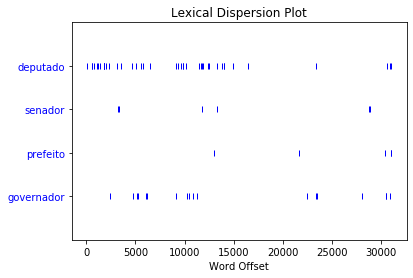

In [35]:
tc.dispersion_plot(['deputado', 'senador', 'prefeito', 'governador'])

# Separando frases
Além de quebrar os textos em seus tokens constituintes, podemos também dividi-los por frases, o que pode ser mais convenientes para certas análises. Para isso utilizamos a função `sent_tokenize` do nltk.

In [36]:
nltk.tokenize.sent_tokenize(tabela.corpo[0])

['\n\n«José Machado Coelho de Castro» nasceu em Lorena (SP).',
 'Estudou no Ginásio Diocesano de São Paulo e bacharelou-se em 1910 pela\nFaculdade de Ciências Jurídicas e Sociais.',
 'Dedicando-se à advocacia, foi\npromotor público em Cunha (SP) e depois delegado de polícia no Rio de\nJaneiro, então Distrito Federal.',
 'Iniciou sua vida política como deputado federal pelo Distrito Federal,\nexercendo o mandato de 1927 a 1929.',
 'Reeleito para a legislatura iniciada\nem maio de 1930, ocupava sua cadeira na Câmara quando, em 3 de outubro,\nfoi deflagrado o movimento revolucionário liderado por Getúlio Vargas.',
 'Ligado ao governo federal, encontrava-se ao lado do presidente\nWashington Luís, no palácio Guanabara, no momento de sua deposição no\ndia 24 de outubro.',
 'Junto com outros companheiros também solidários ao\nregime deposto e que se haviam asilado em embaixadas e legações, foi\nenviado em novembro para o estrangeiro.',
 'Em outubro de 1932, estava\npresente no porto de Alcânt

# Busca textual
Realizar uma busca textual em uma coleção de textos é muito mais eficiente do que simplesmente realizar operações sobre coleções de strings. Neste capítulo iremos examinar como "indexar" o DHBB, usando um simples indexador/buscador chamado [whoosh](https://whoosh.readthedocs.io). 

In [37]:
from whoosh.index import create_in
import os
from whoosh.fields import *
from IPython.core.display import display, HTML

In [38]:
schema = Schema(title=TEXT(stored=True), caminho=ID(stored=True), corpo=TEXT(stored=True))

In [39]:
if not os.path.exists('indexdir'):
    os.mkdir('indexdir')
ix = create_in("indexdir", schema)

In [40]:
writer = ix.writer()

In [42]:
for v in biograficos.itertuples():
    writer.add_document(title=v.title, caminho=v.arquivo,corpo=v.corpo)
writer.commit()

In [93]:
from whoosh.qparser import QueryParser
from whoosh import qparser

In [105]:
def busca(consulta):
    qp = QueryParser("corpo", ix.schema)
    qp.add_plugin(qparser.EveryPlugin())
    query = qp.parse(consulta)
    
    with ix.searcher() as searcher:
        results = [(dict(hit),hit.highlights("corpo")) for hit in searcher.search(query, limit=None)]
    return results
    

In [131]:
resultados = busca('"filha de" OR "filho de"')


In [132]:
print('Resultados:', len(resultados))
for res in resultados[:10]:
    print(res[0]['title'])
    display(HTML(res[1]))

Resultados: 5549
PARANHOS, Galeno


ZITO, Andréia


PAIS, José Nogueira


TOSTES, Lair


TORRES, Fernando


CUNHA, Godofredo Xavier da


SALES FILHO, Antônio Carlos de


COSTA, Romero Cabral da


VEIGA, Edmundo da


BRANDÃO FILHO, Júlio Bueno
